## Preparation
In a Jupyter notebook, install with the command

In [1]:
!pip3 install -U ucimlrepo 

Defaulting to user installation because normal site-packages is not writeable


Import packages and set environment parameters

In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)
import pprint

List dataset and locate the correct ID;
Load the correct dataset with the ID

In [6]:
list_available_datasets(search='diabe')
diabetes = fetch_ucirepo(id=296)

--------------------------------------------------------------
The following datasets are available for search query "diabe":
--------------------------------------------------------------
Dataset Name                                     ID    
------------                                     --    
Diabetes 130-US Hospitals for Years 1999-2008    296   
Diabetic Retinopathy Debrecen                    329   
Early Stage Diabetes Risk Prediction             529   
CDC Diabetes Health Indicators                   891   



C:\Users\xianj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Three Keys under the object; data: Contains dataset matrices as pandas dataframes; Contains metadata information about the dataset; Contains variable details presented in a tabular/dataframe format;

In [7]:
diabetes.keys()

dict_keys(['data', 'metadata', 'variables'])

under diabetes, "data"&"metadata" are dictionary,  "variables" is a dataframe

In [8]:
print(type(diabetes.data), type(diabetes.metadata), type(diabetes.variables))

<class 'ucimlrepo.dotdict.dotdict'> <class 'ucimlrepo.dotdict.dotdict'> <class 'pandas.core.frame.DataFrame'>


store variable dataframe into dfvariables

In [10]:
df_variables = diabetes["variables"]

store the original data in to dforigin 

In [54]:
df_origin = diabetes.data.original
df_origin.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Variable Explorations

### Variable Overview

Data Shape 

In [118]:
df_origin.shape

(101766, 50)

Varible Summary Table

In [40]:
pd.set_option('display.max_colwidth', None)
from IPython.display import display
df_variables['Unique Values']=[df_origin[col].nunique() for col in df_origin.columns]
df_variables['Missing Values Qty']=[df_origin[col].isnull().sum() for col in df_origin.columns]
display(df_variables[['name',"type","role","Unique Values","Missing Values Qty","description"]].style.set_properties(**{'text-align': 'left'}))

,name,type,role,Unique Values,Missing Values Qty,description
0,encounter_id,,ID,101766,0,Unique identifier of an encounter
1,patient_nbr,,ID,71518,0,Unique identifier of a patient
2,race,Categorical,Feature,5,2273,"Values: Caucasian, Asian, African American, Hispanic, and other"
3,gender,Categorical,Feature,3,0,"Values: male, female, and unknown/invalid"
4,age,Categorical,Feature,10,0,"Grouped in 10-year intervals: [0, 10), [10, 20),..., [90, 100)"
5,weight,Categorical,Feature,9,98569,Weight in pounds.
6,admission_type_id,Categorical,Feature,8,0,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available"
7,discharge_disposition_id,Categorical,Feature,26,0,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available"
8,admission_source_id,Categorical,Feature,17,0,"Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital"
9,time_in_hospital,Integer,Feature,14,0,Integer number of days between admission and discharge


Descriptive Statistics Table

In [99]:
df_desc_stats=df_origin[[i for i in df_variables[df_variables["type"]=="Integer"]["name"]]].describe().round(2).T
df_desc_stats.head()

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.40,2.99,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.10,19.67,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.34,1.71,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.02,8.13,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.37,1.27,0.0,0.0,0.0,0.0,42.0


Categorical Variable Frequency Table

In [94]:
rows = []
for col in df_origin[[i for i in df_variables[df_variables["type"]=="Categorical"]["name"]]].columns:
    dftmp = df_origin[col].value_counts()
    for subcat,qty in zip(dftmp.index,dftmp.values):
        rows.append({"Column Name": col, "Catergory": subcat, "Count": qty})
    df_variable_freq=pd.DataFrame(rows)
df_variable_freq.head()

,Column Name,Catergory,Count
0,race,Caucasian,76099
1,race,AfricanAmerican,19210
2,race,Hispanic,2037
3,race,Other,1506
4,race,Asian,641


Missing Value Table by Variable

In [101]:
rows = []
for col in df_origin.columns:
    rows.append({"Column": col, "Missing Values Qty": df_origin[col].isnull().sum(), "Missing Values %": round(df_origin[col].isnull().sum()/len(df_origin)*100,2)})
df_missing_values=pd.DataFrame(rows)
df_missing_values.head()

,Column,Missing Values Qty,Missing Values %
0,encounter_id,0,0.00
1,patient_nbr,0,0.00
2,race,2273,2.23
3,gender,0,0.00
4,age,0,0.00


Unique Value Table by Variable

In [117]:
uniq_count=df_origin.nunique()
df_uniq_count=pd.DataFrame({
    "Unique Values": uniq_count,
    "Type": df_variables["type"].values
})

df_uniq_count

,Unique Values,Type
encounter_id,101766,
patient_nbr,71518,
race,5,Categorical
gender,3,Categorical
age,10,Categorical
weight,9,Categorical
admission_type_id,8,Categorical
discharge_disposition_id,26,Categorical
admission_source_id,17,Categorical
time_in_hospital,14,Integer


## Univariate Analysis

### Histograms of Counts for Categorical Features

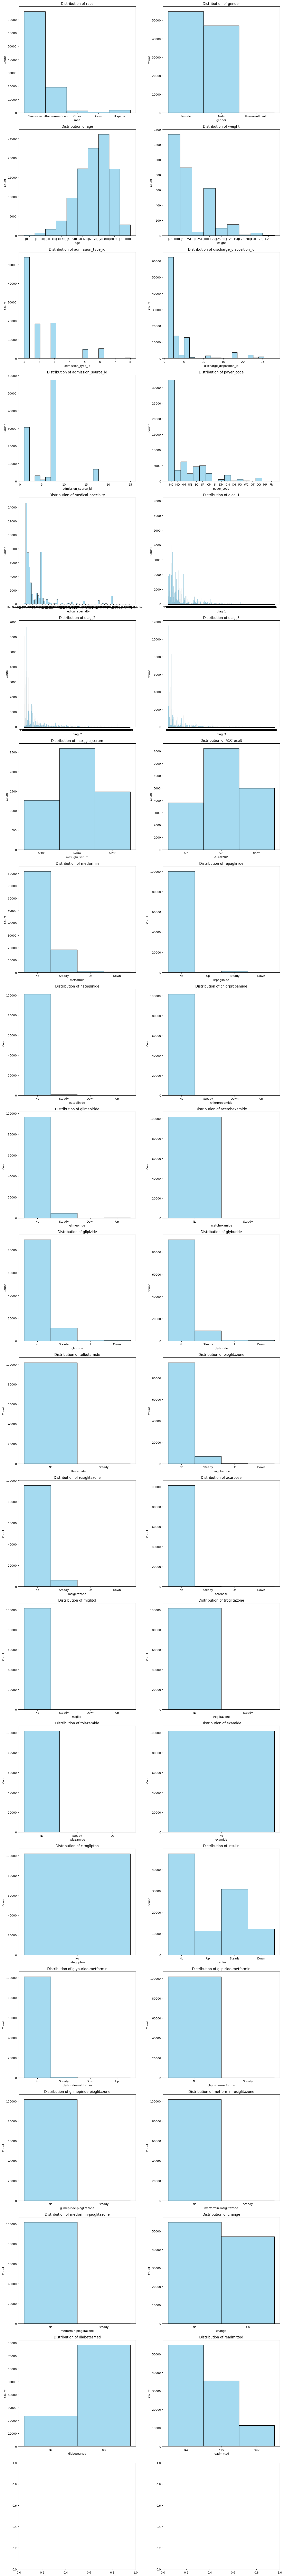

In [148]:
tmpdf = df_variables[df_variables["type"] == "Categorical"]["name"]
nrows = len(tmpdf)//2 + 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 6*nrows))

for idx, col in enumerate(tmpdf):
    row = idx // ncols
    col_idx = idx % ncols
    sns.histplot(df_origin[col], bins=20, ax=axes[row, col_idx], color='skyblue')
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
# Single diag example
# axes[0].bar(df_origin["gender"].value_counts().index,df_origin["gender"].value_counts(),color='maroon')
# axes[0].set_title('Count Plot of Gender')
# axes[0].set_xlabel('Gender')
# axes[0].set_ylabel('Count')
# axes[0].set_figure
# plt.tight_layout()
# plt.show()



### kernel Density Plot
https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-in-python/
https://www.geeksforgeeks.org/data-analysis/what-is-exploratory-data-analysis/